In [115]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

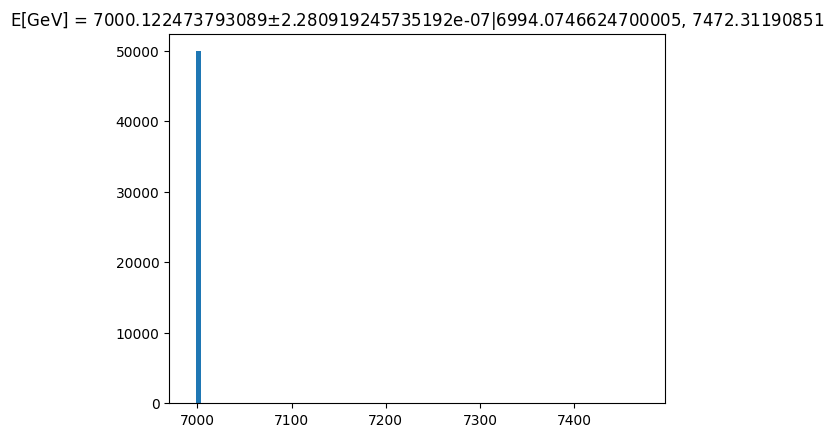

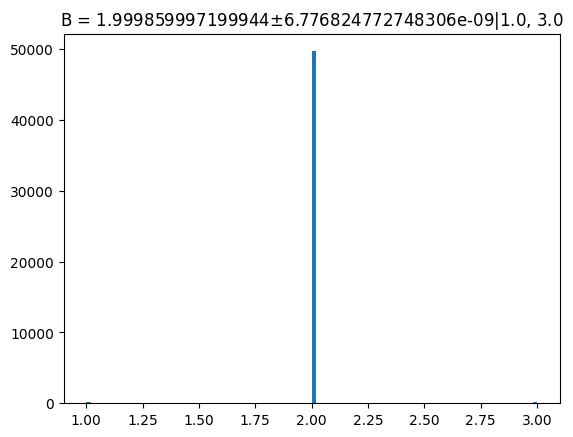

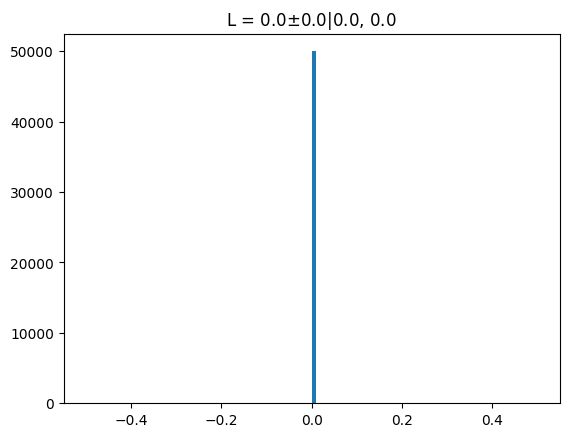

49999


In [116]:
with open('phsd.csv.statistics', newline='\n') as csvfile:
    reader = csv.reader(csvfile, delimiter=';', quotechar='|')
    data = list(map(
        lambda x: list(map(lambda y: y.strip(), x[1])) if (x[0] == 0) else list(map(float, x[1])),
        enumerate(reader)
    ))
    df = pd.DataFrame(data[1:], columns=data[0])

    for i in df:
        
        plt.hist(df[i], bins=100)
        mid = sum(df[i]) / len(df[i])
        sigma = (sum((df[i] - mid)**2))**(0.5) / (len(df[i]) * (len(df[i]) - 1))
        plt.title(i + f" = {mid}$\pm${sigma}|{min(df[i])}, {max(df[i])}")
        plt.show()
    print(len(df))

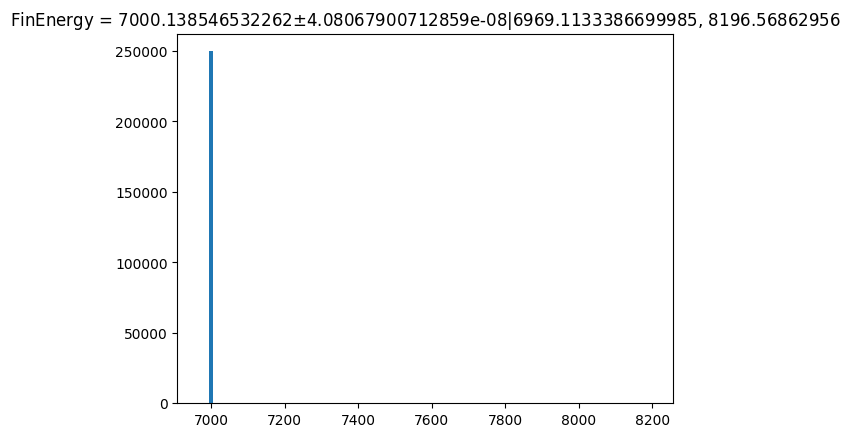

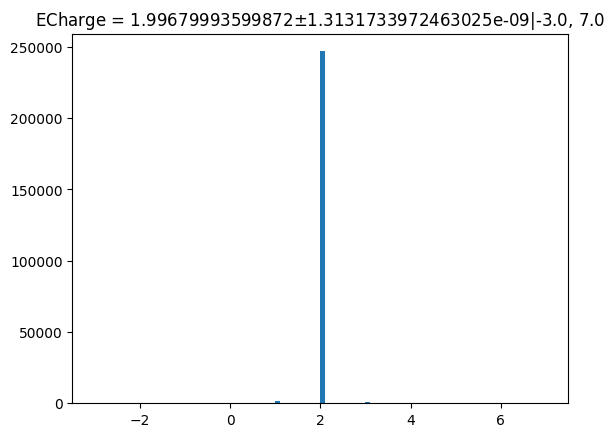

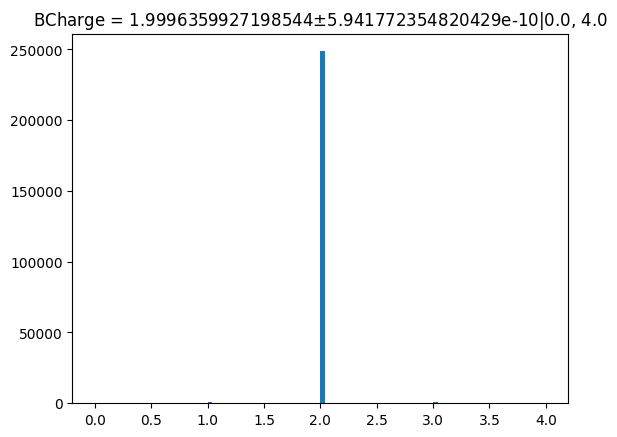

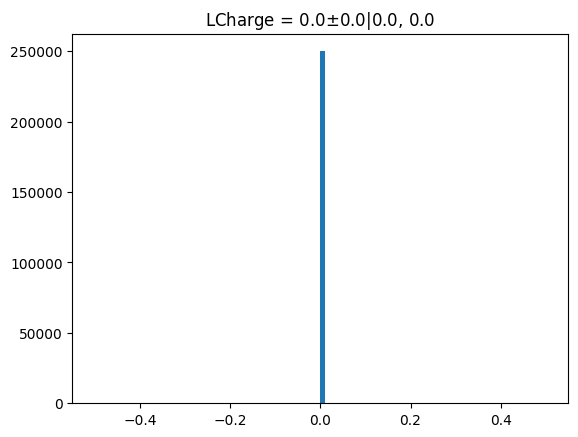

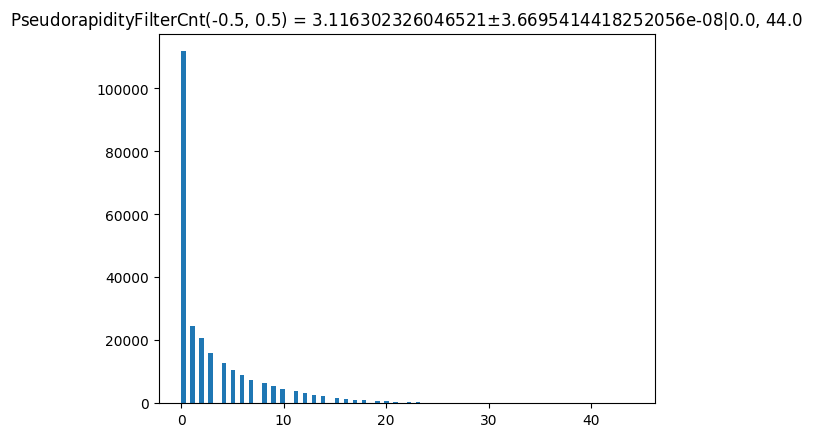

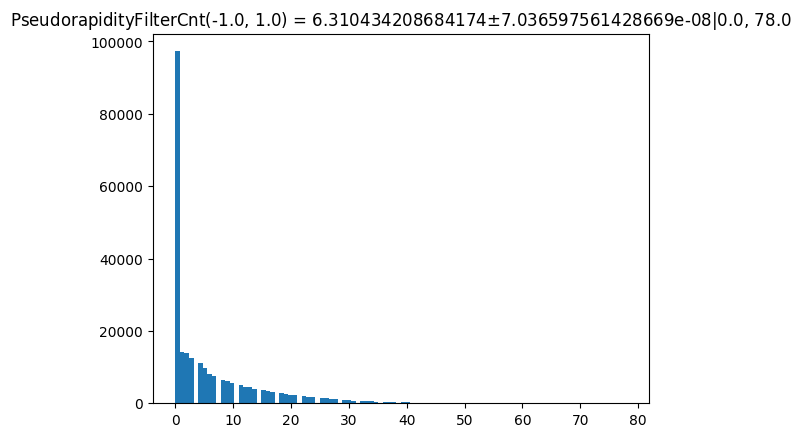

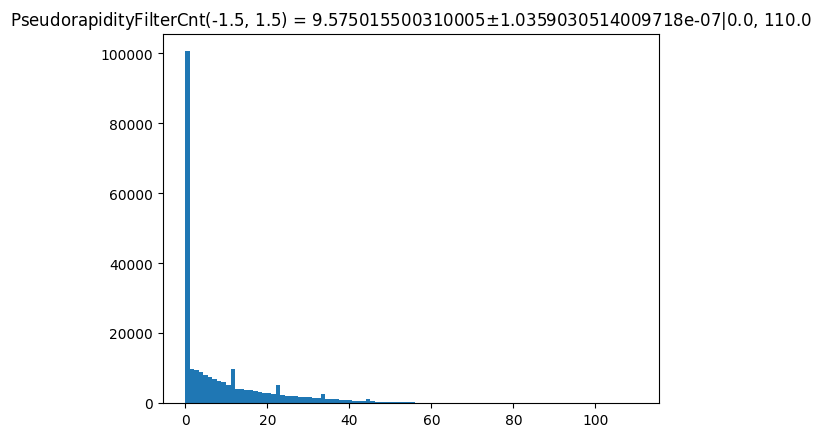

249995


In [117]:

dt = None

with open('phsd.csv.stat', newline='\n') as csvfile:
    reader = csv.reader(csvfile, delimiter=';', quotechar='|')
    data = list(map(
        lambda x: list(map(lambda y: y.strip(), x[1])) if (x[0] == 0) else list(map(float, x[1])),
        enumerate(reader)
    ))
    df = pd.DataFrame(data[1:], columns=data[0])

    for i in df:
        
        plt.hist(df[i], bins=100)
        mid = sum(df[i]) / len(df[i])
        sigma = (sum((df[i] - mid)**2))**(0.5) / (len(df[i]) * (len(df[i]) - 1))
        plt.title(i + f" = {mid}$\pm${sigma}|{min(df[i])}, {max(df[i])}")
        plt.show()
    print(len(df))
    dt = df

In [118]:
dt

,FinEnergy,ECharge,BCharge,LCharge,"PseudorapidityFilterCnt(-0.5, 0.5)","PseudorapidityFilterCnt(-1.0, 1.0)","PseudorapidityFilterCnt(-1.5, 1.5)"
0,7000.080200,2.0,2.0,0.0,0.0,0.0,0.0
1,7000.080161,2.0,2.0,0.0,5.0,9.0,14.0
2,7000.080200,2.0,2.0,0.0,0.0,0.0,0.0
3,7000.080343,2.0,2.0,0.0,2.0,6.0,6.0
4,7000.080294,2.0,2.0,0.0,3.0,3.0,6.0
...,...,...,...,...,...,...,...
249990,7000.080200,2.0,2.0,0.0,0.0,0.0,0.0
249991,7000.080200,2.0,2.0,0.0,0.0,0.0,0.0
249992,7000.080313,2.0,2.0,0.0,1.0,2.0,3.0
249993,7000.080245,2.0,2.0,0.0,4.0,5.0,8.0


In [119]:
def buildHistAlice(dNu, Alice, others, label="other", log=False, marker="*", frac=False):
    
    if log:
        plt.figure().set_size_inches(15, 15)
        plt.rc('axes', labelsize=25)
        plt.rc('legend', fontsize=25)
        plt.tick_params(axis='x', labelsize=32)
        plt.tick_params(axis='y', labelsize=32)
        
        plt.yscale("log")
    else:
        plt.figure().set_size_inches(10, 10)
        plt.rc('axes', labelsize=20)
        plt.rc('legend', fontsize=20)
        plt.tick_params(axis='x', labelsize=30)
        plt.tick_params(axis='y', labelsize=30)

    
    if frac:
        plt.errorbar(Alice.loc[:, "$N_{ch}$"], Alice.loc[:, "$P(N_{ch})$"]/Alice.loc[:, "$P(N_{ch})$"], yerr=Alice.loc[:, "error +"]/Alice.loc[:, "$P(N_{ch})$"], fmt="or",ecolor="red", elinewidth=2, label="ALICE", capsize=2)
    else:
        plt.errorbar(Alice.loc[:, "$N_{ch}$"], Alice.loc[:, "$P(N_{ch})$"], yerr=Alice.loc[:, "error +"], fmt="or",ecolor="red", elinewidth=2, label="ALICE", capsize=2)

    # bins = Alice.loc[:, "$N_{ch}$"] - (Alice.loc[:, "$N_{ch}$"][1] - Alice.loc[:, "$N_{ch}$"][0])/2
    bins = list(Alice.loc[:, "$N_{ch}$ LOW"])
    bins.append(bins[-1]+1)
    bins = np.array(bins)
    print(bins)
    sigmas = {}
        
    muls = np.histogram(others, bins=bins, density=False)
    print(muls)
    muls = list(muls)
    muls[0] = muls[0] / len(others)
    if frac:
        muls[0] =  np.array(muls[0]) / Alice.loc[:, "$P(N_{ch})$"]
    print(len(muls[0]), len(Alice.loc[:, "$N_{ch}$"]))
    plt.scatter(Alice.loc[:, "$N_{ch}$"], muls[0], label=label, zorder=3, marker=marker, s=70, color=(0, 0, 0, 0.5))
    sigmas[label] = np.sqrt(sum((muls[0] - Alice.loc[:, "$P(N_{ch})$"])**2) / (len(muls[0])) )

    plt.xlabel("$N_{ch}$ " + f", $|\\eta|\\leq {dNu}$")
    if not frac:
        plt.ylabel("$N/N_{events}$")
    else :
        plt.ylabel("$Model/Data$")
    # plt.title(f"Multiplicity")
    plt.legend()

    if frac:
        plt.ylim(0, 2)

    if not log:
        plt.xlim(-1, 60)
    
    return sigmas


ALice readed
[ -0.5   0.5   1.5   2.5   3.5   4.5   5.5   6.5   7.5   8.5   9.5  10.5
  11.5  12.5  13.5  14.5  15.5  16.5  17.5  18.5  19.5  20.5  21.5  22.5
  23.5  24.5  25.5  26.5  27.5  28.5  29.5  30.5  31.5  32.5  33.5  34.5
  35.5  36.5  37.5  38.5  39.5  40.5  41.5  42.5  43.5  44.5  45.5  46.5
  47.5  48.5  49.5  50.5  51.5  52.5  53.5  54.5  55.5  56.5  57.5  58.5
  59.5  60.5  61.5  62.5  63.5  64.5  65.5  66.5  67.5  68.5  69.5  70.5
  71.5  72.5  73.5  74.5  75.5  76.5  77.5  78.5  79.5  80.5  81.5  82.5
  83.5  84.5  85.5  86.5  87.5  88.5  89.5  90.5  91.5  92.5  93.5  94.5
  95.5  96.5  97.5  98.5  99.5 100.5 101.5 102.5 103.5 104.5 105.5 106.5
 107.5 108.5 109.5 110.5 111.5 112.5 113.5 114.5 115.5 116.5 117.5 118.5
 119.5 120.5 121.5 122.5 123.5 124.5 125.5 126.5 127.5 128.5 129.5 130.5
 131.5 132.5 133.5 134.5 135.5 136.5 137.5 138.5 139.5 140.5 141.5 142.5
 143.5 144.5 145.5 146.5 147.5 148.5 149.5 150.5 151.5]
(array([91247,  9385,  9793,  9519,  8979,  8167,  7457

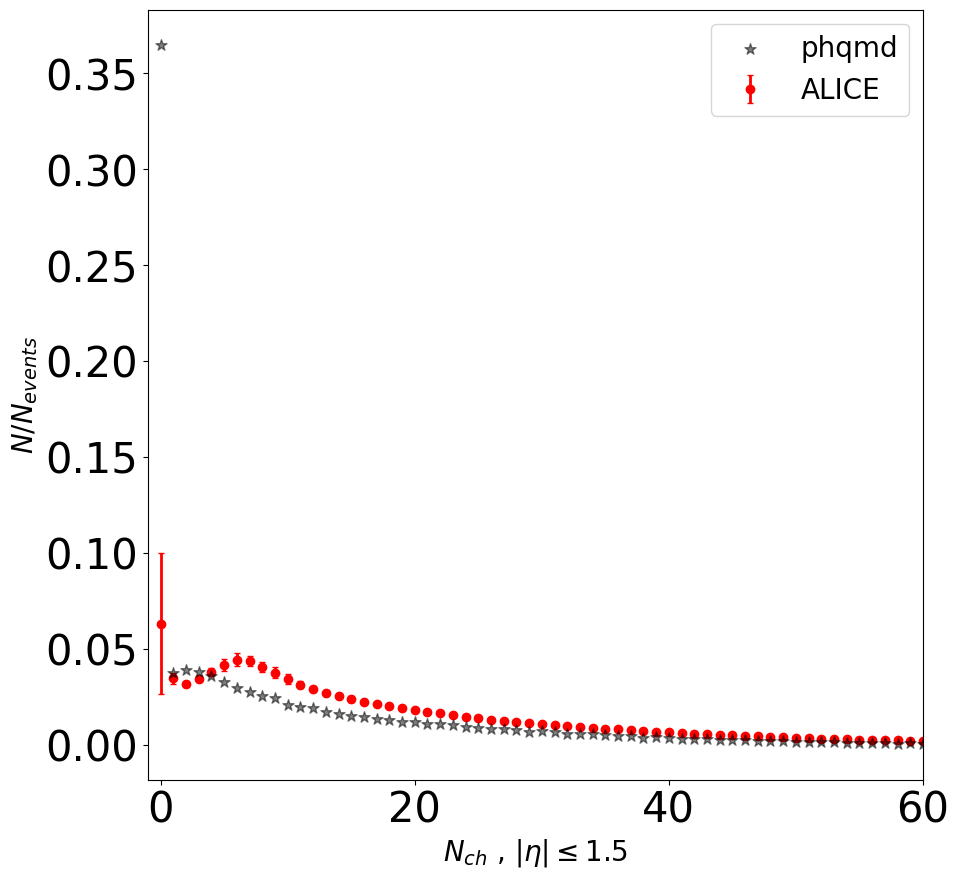

In [120]:
Alice = pd.read_csv('./data/hepdata/HEPData-ins1394854-v1-Table_36.csv', delimiter=",")

print("ALice readed")

resz = buildHistAlice(1.5, Alice, dt["PseudorapidityFilterCnt(-1.5, 1.5)"], label="phqmd")

print(resz)
# print(reszlog)

ALice readed
[ -0.5   0.5   1.5   2.5   3.5   4.5   5.5   6.5   7.5   8.5   9.5  10.5
  11.5  12.5  13.5  14.5  15.5  16.5  17.5  18.5  19.5  20.5  21.5  22.5
  23.5  24.5  25.5  26.5  27.5  28.5  29.5  30.5  31.5  32.5  33.5  34.5
  35.5  36.5  37.5  38.5  39.5  40.5  41.5  42.5  43.5  44.5  45.5  46.5
  47.5  48.5  49.5  50.5  51.5  52.5  53.5  54.5  55.5  56.5  57.5  58.5
  59.5  60.5  61.5  62.5  63.5  64.5  65.5  66.5  67.5  68.5  69.5  70.5
  71.5  72.5  73.5  74.5  75.5  76.5  77.5  78.5  79.5  80.5  81.5  82.5
  83.5  84.5  85.5  86.5  87.5  88.5  89.5  90.5  91.5  92.5  93.5  94.5
  95.5  96.5  97.5  98.5  99.5 100.5 101.5 102.5 103.5 104.5 105.5 106.5
 107.5 108.5 109.5 110.5 111.5 112.5 113.5 114.5 115.5]
(array([97288, 14175, 13823, 12503, 11078,  9819,  8147,  7675,  6550,
        6086,  5585,  5081,  4512,  4432,  4030,  3630,  3409,  3173,
        2865,  2494,  2359,  2210,  2068,  1823,  1668,  1593,  1402,
        1238,  1128,   997,   848,   754,   660,   622,   580, 

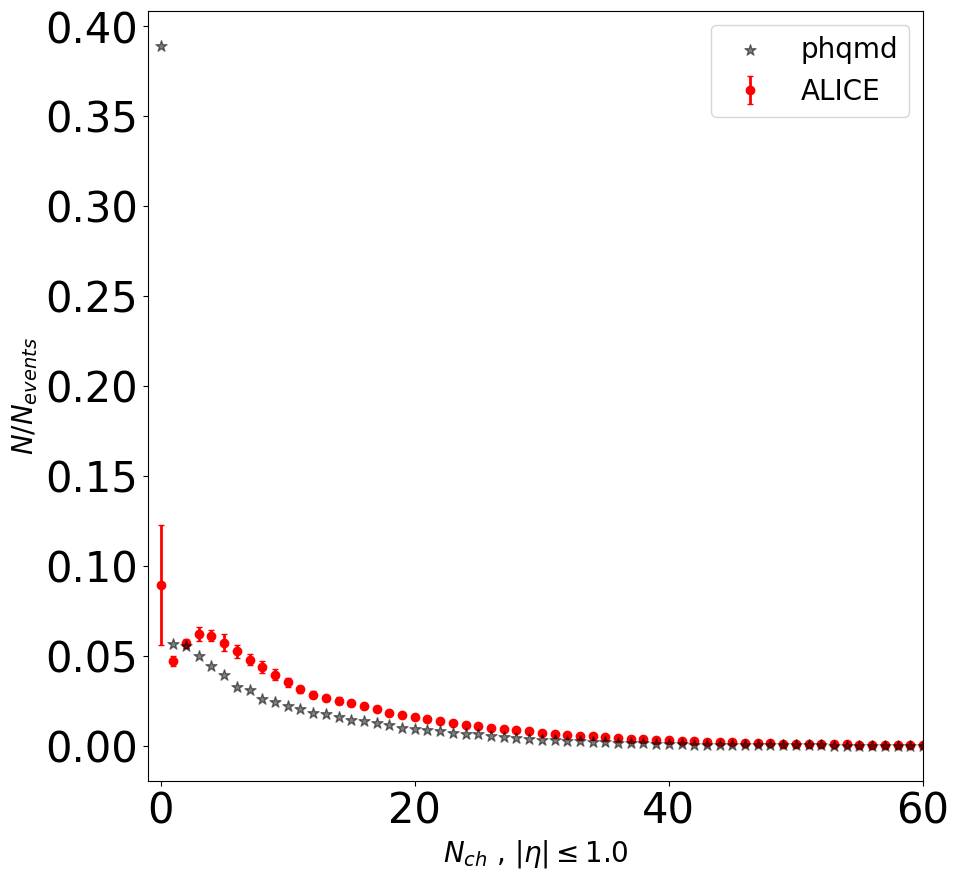

In [121]:
Alice = pd.read_csv('./data/hepdata/HEPData-ins1394854-v1-Table_35.csv', delimiter=",")

print("ALice readed")

resz = buildHistAlice(1.0, Alice, dt["PseudorapidityFilterCnt(-1.0, 1.0)"], label="phqmd")

print(resz)
# print(reszlog)

ALice readed
[-0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5
 13.5 14.5 15.5 16.5 17.5 18.5 19.5 20.5 21.5 22.5 23.5 24.5 25.5 26.5
 27.5 28.5 29.5 30.5 31.5 32.5 33.5 34.5 35.5 36.5 37.5 38.5 39.5 40.5
 41.5 42.5 43.5 44.5 45.5 46.5 47.5 48.5 49.5 50.5 51.5 52.5 53.5 54.5
 55.5 56.5 57.5 58.5 59.5 60.5 61.5 62.5 63.5 64.5 65.5 66.5 67.5]
(array([111802,  24702,  20626,  15909,  12842,  10708,   8823,   7427,
         6376,   5640,   4603,   3774,   3166,   2606,   2196,   1817,
         1455,   1181,    887,    807,    600,    491,    335,    277,
          191,    180,    152,    125,     56,     69,     36,     30,
           32,     11,     13,     25,      7,      5,      5,      0,
            4,      0,      0,      2,      2,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0], dtype=int64), array([-0.5, 

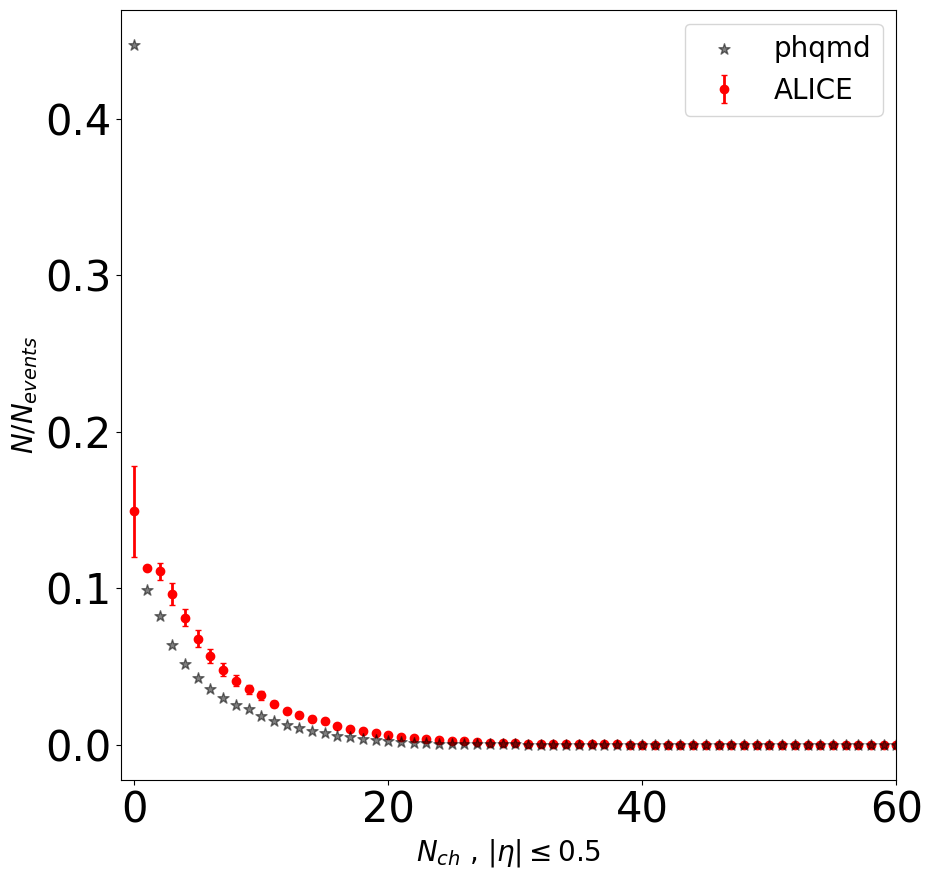

In [122]:
Alice = pd.read_csv('./data/hepdata/HEPData-ins1394854-v1-Table_34.csv', delimiter=",")

print("ALice readed")

resz = buildHistAlice(0.5, Alice, dt["PseudorapidityFilterCnt(-0.5, 0.5)"], label="phqmd")

print(resz)
# print(reszlog)